#1 Даны значения величины заработной платы заемщиков банка (zp) 
и значения их поведенческого кредитного скоринга (ks): 
    zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
    ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
Используя математические операции, посчитать коэффициенты линейной регрессии, 
приняв за X заработную плату (то есть, zp - признак), 
а за y - значения скорингового балла (то есть, ks - целевая переменная). 
Произвести расчет как с использованием intercept, так и без.

In [31]:
import numpy as np
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype = np.float64)
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype = np.float64)

In [32]:
n = len(zp)

b = (np.mean(zp*ks) - np.mean(zp)* np.mean(ks))/ (np.mean(zp**2) - np.mean(zp)**2)
a = np.mean(ks) - b*np.mean(zp)

print(f'y = {a} + {b}x')

y = 444.1773573243596 + 2.620538882402765x


In [33]:
r = b*np.std(zp)/np.std(ks)
R2 = r**2

print( f'{r} {R2}')

0.8874900920739162 0.7876386635293682


In [34]:
y_pred = a + b*zp
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [35]:
mse  = ((y_pred - ks)**2).sum()/n
mse

6470.414201176658

In [20]:
A_mean = 100 * np.mean(np.abs(ks- y_pred)/ks)
A_mean

11.46925184356171

In [22]:
F_fact = (r**2*(n-2))/(1-r**2)
F_fact

29.671640859664432

In [23]:
k1 = 1
k2 = n-2
k2


8

In [ ]:
F_kr = 5.3
#F_kr < F_fact, уравнение статистически значимо


In [ ]:
#без ntercept

In [45]:
x = zp.reshape(10,1)
y = ks.reshape(10,1)
b = np.dot(np.linalg.inv(np.dot(x.T,x)), x.T @ y)
b

array([[5.88982042]])

In [46]:
y_pred = b*zp
y_pred


array([[ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
         235.59281681,  412.28742941,  318.05030269,  883.47306302,
         706.77845042,  647.88024621]])

In [47]:
mse  = ((y_pred - ks)**2).sum()/n
mse

56516.8584157194

In [48]:
A_mean = 100 * np.mean(np.abs(ks- y_pred)/ks)
A_mean

33.225451661167305

In [49]:
F_fact = (r**2*(n-2))/(1-r**2)
F_fact

29.671640859664432

#2 Посчитать коэффициент 
линейной регрессии при заработной плате (zp), 
используя градиентный спуск (без intercept). 
*3. Произвести вычисления как в пункте 2, но с вычислением intercept. 
Учесть, что изменение коэффициентов должно
производиться на каждом шаге одновременно 
(то есть изменение одного коэффициента не должно 
 влиять на изменение другого во время одной итерации).

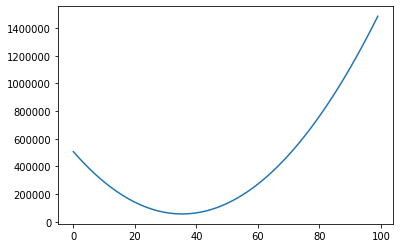

In [145]:
X=zp
y=ks
def mse_(B1, y=y, X=X, n=10):
    return np.sum((B1*X-y)**2)/n
a = 0.000001
B1 = 0.01
m = []
b = []
for i in range(100):
    B1-= a*(2/n)*np.sum(B1*X-y*X)
    m.append(mse_(B1))
    b.append(B1)
    #print(f' B1={B1} mse ={mse_(B1)}')

    
from matplotlib import pyplot as plt
%matplotlib inline   
plt.plot(m)  



In [146]:
v, i = min((v,i) for (i,v) in enumerate(m))
b[i]

5.831443249536272

In [147]:
#3
B1 = 0.01
B0 = 0.01

def mse_(B0, B1, y=y, X=X, n=10):
    return np.sum((B0+B1*X-y)**2)/n

In [148]:
a = 1e-05
b1=[]
b0=[]
for i in range(500000):
    y_pred = B0+B1*X
    B0-= a*(2/n)*np.sum((y_pred-y))
    B1-= a*(2/n)*np.sum((y_pred-y)*X)
    m.append(mse_(B0, B1))
    b1.append(B1)
    b0.append(B0)
   # print(f' B1={B1} mse ={mse_(B0,B1)}')

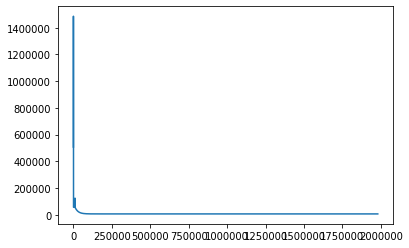

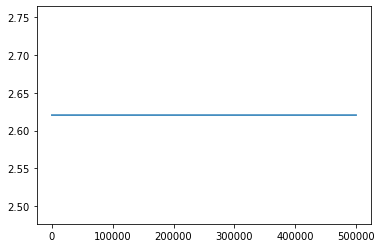

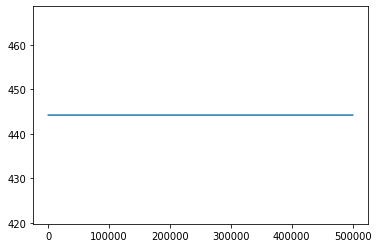

In [139]:
from matplotlib import pyplot as plt
%matplotlib inline   
plt.figure()
plt.plot(m)
plt.figure()
plt.plot(b1)
plt.figure()
plt.plot(b0)

In [150]:
print( f'{b1[-1]} {b0[-1]}') 

2.6205490302338164 444.17597862578714
